<a href="https://colab.research.google.com/github/mcucii/TextToImageGeneration_StackGAN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/RIProject')

In [6]:
import config as cfg
from dataset import TextImageDataset
from stage1 import GANTrainer_stage1
from stage2 import GANTrainer_stage2

In [7]:

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch

In [8]:
class Args:
    train = 1
    stage = 1

# za 40 vrsti
# cfg.TRAIN_DISCRIMINATOR_LR = 0.00005
# cfg.TRAIN_GENERATOR_LR = 0.0002
cfg.DATA_DIR =  '/content/drive/MyDrive/RIProject/data_reduced1/birds'

if Args.stage == 1:
    cfg.IMG_SIZE = 64
    cfg.TRAIN_DISCRIMINATOR_LR = 0.0001
    cfg.TRAIN_GENERATOR_LR = 0.0005 # RADI FINO ZA GEN LR = 0.0005 i 1 vrstu
    cfg.NET_G = ''
    cfg.NET_D = ''
else:
    cfg.IMG_SIZE = 256
    cfg.TRAIN_DISCRIMINATOR_LR = 0.00001
    cfg.TRAIN_GENERATOR_LR = 0.0002
    cfg.STAGE1_G = "data_reduced40/birds/Model_stage1/netG_epoch_100.pth"
    cfg.STAGE1_D = "data_reduced40/birds/Model_stage1/netD_epoch_100.pth"


cfg.STAGE = Args.stage

if Args.train == 1:
    cfg.TRAIN = True
else:
    cfg.NET_G = "../data_reduced40/birds/Model_stage2/netG_epoch_200.pth"
    cfg.NET_D = "../data_reduced40/birds/Model_stage2/netD_epoch_200.pth"
    cfg.TRAIN = False

if torch.cuda.is_available():
  cfg.DEVICE = 'cuda'
else:
  cfg.DEVICE = 'cpu'

output_dir = '../output/birds'

In [13]:
def train():
  image_transform = transforms.Compose([
      transforms.RandomResizedCrop(cfg.IMG_SIZE),  # Randomly crop and resize the image
      transforms.RandomHorizontalFlip(),         # Randomly flip the image horizontally
      transforms.ColorJitter(),                  # Randomly adjust brightness, contrast, saturation, and hue
      transforms.ToTensor(),                     # Convert the image to a PyTorch tensor
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
  ])

  image_transform2 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.1),  # Minimalna šansa za horizontalno ogledanje slike
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.02),  # Vrlo mala promena osvetljenosti, kontrasta, saturacije i nijanse
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalizacija slike
  ])

  image_transform3 = transforms.Compose([
            transforms.RandomCrop(cfg.IMG_SIZE),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

  dataset = TextImageDataset(cfg.DATA_DIR, 'train', input_transform=image_transform2)
  dataset_size = len(dataset)
  #print(f"Veličina skupa podataka: {dataset_size}")

  dataloader = DataLoader(dataset, batch_size=cfg.TRAIN_BATCH_SIZE, drop_last=True, shuffle=True, num_workers=4)
  batch_size = dataloader.batch_size
  #print(f"Veličina batch-a: {batch_size}")

  num_batches_per_epoch = len(dataloader)
  #print(f"Broj batch-eva po epohi: {num_batches_per_epoch}")

  if Args.stage == 1:
    trainer = GANTrainer_stage1(output_dir)
  else:
    trainer = GANTrainer_stage2(output_dir)

  trainer.train(dataloader)

In [14]:
def test():
    image_transform = transforms.Compose([
                transforms.Resize(32),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    dataset = TextImageDataset(cfg.DATA_DIR, 'test', embedding_filename=cfg.EMBEDDING_FILENAME, input_transform=image_transform)
    dataloader = DataLoader(dataset, batch_size=cfg.TRAIN_BATCH_SIZE, drop_last=True, shuffle=True, num_workers=4)
    N = len(dataloader)

    if Args.stage == 1:
        trainer = GANTrainer_stage1(output_dir)
    else:
        trainer = GANTrainer_stage2(output_dir)

    trainer.test(dataloader)

    dataset_generated = TextImageDataset(cfg.DATA_DIR, 'test', embedding_filename=cfg.EMBEDDING_FILENAME, img_size=cfg.IMG_SIZE, input_transform=image_transform)
    dataloader_generated = torch.utils.data.DataLoader(dataset_generated, batch_size=cfg.TRAIN_BATCH_SIZE, drop_last=True, shuffle=True, num_workers=4)


In [15]:
def main():

  if Args.train == 0:
    cfg.TRAIN = False  # True by default (train)
  else:
    cfg.TRAIN = True

  if Args.stage == 1:
    cfg.IMG_SIZE = 64
    cfg.STAGE = 1
  else :
    cfg.IMG_SIZE = 256
    cfg.STAGE = 2

  output_dir = '../output/birds'


  if Args.train:
    train()
  else:
    test()


broj epoha 100


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0/100], Step [0/1], Generator Loss: 4.5103912353515625, Discriminator Loss: 1.9260982275009155
Save G/D models
Epoch [1/100], Step [0/1], Generator Loss: 1.3327391147613525, Discriminator Loss: 2.788015842437744
Save G/D models
Epoch [2/100], Step [0/1], Generator Loss: 1.549599289894104, Discriminator Loss: 1.9275892972946167
Save G/D models
Epoch [3/100], Step [0/1], Generator Loss: 3.0449166297912598, Discriminator Loss: 2.0149075984954834
Save G/D models
Epoch [4/100], Step [0/1], Generator Loss: 3.3688714504241943, Discriminator Loss: 1.8733811378479004
Save G/D models
Epoch [5/100], Step [0/1], Generator Loss: 2.780496835708618, Discriminator Loss: 1.5357379913330078
Save G/D models
Epoch [6/100], Step [0/1], Generator Loss: 2.953951597213745, Discriminator Loss: 1.4126510620117188
Save G/D models
Epoch [7/100], Step [0/1], Generator Loss: 3.1571199893951416, Discriminator Loss: 1.4905240535736084
Save G/D models
Epoch [8/100], Step [0/1], Generator Loss: 2.609062194824218

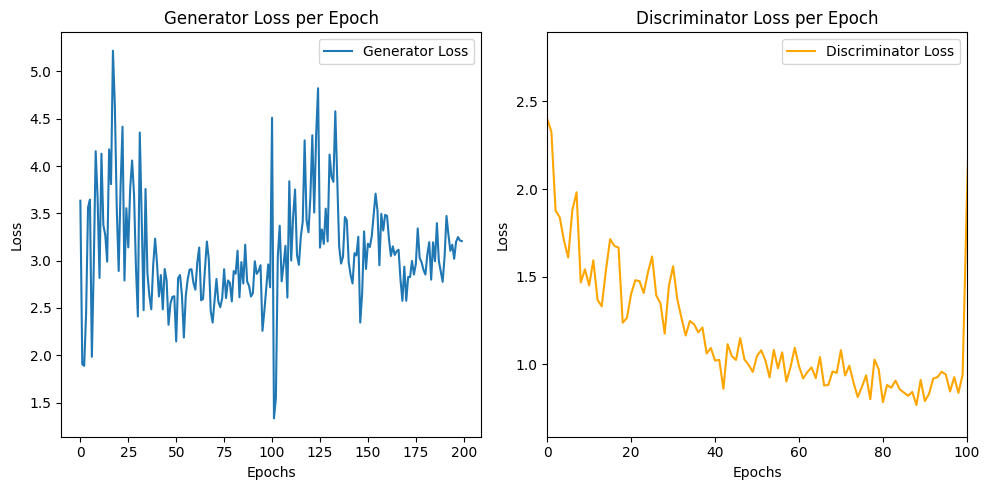

In [16]:
main()